Análisis Exploratorio de los datos(Exploratory Data Analysis = EDA):

El reporte debe incluir un resumen de estadísticas descriptivas de los datasets, análisis univariados (por ejemplo, distribución de variables numéricas), análisis bivariados (correlación entre variables numéricas y/o categóricas); y cualquier análisis que le ayude al mejor entendimiento de los datos (encontrar patrones, outliers y/o anomalías, entre otros). El reporte debe presentarse en un notebook (.ipynb) con adecuado uso de markdowns y comentarios.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spy = yf.download("^GSPC", start="2000-01-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
spy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-02-17,4077.389893,4081.510010,4047.949951,4079.090088,4079.090088,4045480000
2023-02-21,4052.350098,4052.350098,3995.189941,3997.340088,3997.340088,4121590000
2023-02-22,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000


In [4]:
dji = yf.download('^DJI', start='2000-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
dji

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,11501.849609,11522.009766,11305.690430,11357.509766,11357.509766,169750000
2000-01-04,11349.750000,11350.059570,10986.450195,10997.929688,10997.929688,178420000
2000-01-05,10989.370117,11215.099609,10938.669922,11122.650391,11122.650391,203190000
2000-01-06,11113.370117,11313.450195,11098.450195,11253.259766,11253.259766,176550000
2000-01-07,11247.059570,11528.139648,11239.919922,11522.559570,11522.559570,184900000
...,...,...,...,...,...,...
2023-02-17,33677.011719,33846.640625,33517.730469,33826.691406,33826.691406,302900000
2023-02-21,33699.691406,33699.691406,33115.738281,33129.589844,33129.589844,348320000
2023-02-22,33169.328125,33245.968750,32948.269531,33045.089844,33045.089844,321910000


## REEMPLAZAMOS LOS VALORES NULOS (SI ES QUE EXISTEN) POR '0'

In [6]:
spy.fillna(0, inplace=True)
dji.fillna(0, inplace=True)

## CLASIFICAMOS POR SECTOR E INDUSTRIA

In [7]:
#Clasificamos las empresas por sector e industria
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0][['Symbol', 'Security', 'GICS Sector']].set_index(['Symbol'])

In [8]:
data

,Security,GICS Sector
Symbol,,
MMM,3M,Industrials
AOS,A. O. Smith,Industrials
ABT,Abbott,Health Care
ABBV,AbbVie,Health Care
ACN,Accenture,Information Technology
...,...,...
YUM,Yum! Brands,Consumer Discretionary
ZBRA,Zebra Technologies,Information Technology
ZBH,Zimmer Biomet,Health Care


## CREAMOS UN DF POR CADA SECTOR DEL SPY

In [9]:
#Vemos que sectores tenemos, eliminando los duplicados
sectores = list(set(data['GICS Sector']))
sectores

['Real Estate',
 'Health Care',
 'Consumer Discretionary',
 'Utilities',
 'Communication Services',
 'Industrials',
 'Financials',
 'Energy',
 'Consumer Staples',
 'Information Technology',
 'Materials']

In [10]:
consumer_df = data[data['GICS Sector'] == 'Consumer Discretionary']
consumer_df

,Security,GICS Sector
Symbol,,
AAP,Advance Auto Parts,Consumer Discretionary
AMZN,Amazon,Consumer Discretionary
APTV,Aptiv,Consumer Discretionary
AZO,AutoZone,Consumer Discretionary
BBWI,"Bath & Body Works, Inc.",Consumer Discretionary
BBY,Best Buy,Consumer Discretionary
BKNG,Booking Holdings,Consumer Discretionary
BWA,BorgWarner,Consumer Discretionary
CZR,Caesars Entertainment,Consumer Discretionary


In [11]:
energia_df = data[data['GICS Sector'] == 'Energy']
energia_df

,Security,GICS Sector
Symbol,,
APA,APA Corporation,Energy
BKR,Baker Hughes,Energy
CVX,Chevron Corporation,Energy
COP,ConocoPhillips,Energy
CTRA,Coterra,Energy
DVN,Devon Energy,Energy
FANG,Diamondback Energy,Energy
EOG,EOG Resources,Energy
EQT,EQT,Energy


In [12]:
xle = yf.download('XLE', start='2000-01-01')

[*********************100%***********************]  1 of 1 completed


In [13]:
xle

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,27.312500,27.312500,26.375000,26.562500,14.830883,380300
2000-01-04,26.312500,26.312500,25.875000,26.062500,14.551711,722200
2000-01-05,26.125000,26.750000,26.000000,26.750000,14.935573,337800
2000-01-06,26.750000,27.843750,26.750000,27.781250,15.511359,133100
2000-01-07,27.687500,28.406250,27.687500,28.078125,15.677118,468000
...,...,...,...,...,...,...
2023-02-17,86.250000,86.309998,84.120003,84.489998,84.489998,22320000
2023-02-21,84.120003,85.040001,83.910004,84.070000,84.070000,16811300
2023-02-22,83.839996,84.629997,82.790001,83.510002,83.510002,20135200


In [14]:
energicas = ['APA', 
            'BKR',
            'CVX',
            'COP',
            'CTRA',
            'DVN', 
            'FANG', 
            'EOG', 
            'EQT', 
            'XOM', 
            'HAL', 
            'HES', 
            'KMI', 
            'MRO', 
            'MPC', 
            'OXY', 
            'OKE', 
            'PSX', 
            'PXD', 
            'SLB', 
            'TRGP', 
            'VLO', 
            'WMB'
]

recolector = []
for nemo in energicas:
    ticker = yf.Ticker(nemo)
    px = ticker.history(start='2000-01-01', interval='1d')[['Open', 'Close','Volume']]
    px.columns = [f"{nemo}_{col}" for col in px.columns]
    recolector.append(px)

energy_spy = pd.concat(recolector, axis=1)


In [15]:
energy_spy

,APA_Open,APA_Close,APA_Volume,BKR_Open,BKR_Close,BKR_Volume,CVX_Open,CVX_Close,CVX_Volume,COP_Open,...,SLB_Volume,TRGP_Open,TRGP_Close,TRGP_Volume,VLO_Open,VLO_Close,VLO_Volume,WMB_Open,WMB_Close,WMB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,12.181660,11.330811,1082697,10.471123,9.665652,1468700,18.330091,17.849827,4387600,8.522393,...,7239800,NaN,NaN,NaN,2.629284,2.530066,966658,10.036264,10.036264,2366796
2000-01-04 00:00:00-05:00,10.957271,10.832757,2959572,9.576155,9.665652,2082300,17.703079,17.849827,3702400,8.224565,...,7963000,NaN,NaN,NaN,2.521797,2.505260,1176269,9.550642,9.813689,3364720
2000-01-05 00:00:00-05:00,10.915768,11.144045,2170014,9.725318,9.725318,1833700,17.729765,18.170008,5567600,8.190202,...,4826200,NaN,NaN,NaN,2.530064,2.596210,866010,9.874386,10.420714,2731730
2000-01-06 00:00:00-05:00,11.455333,12.202419,2416029,9.874475,10.650113,2234700,18.210023,18.943760,4353400,8.018376,...,8005000,NaN,NaN,NaN,2.596209,2.678891,1265102,10.420716,10.643294,8654732
2000-01-07 00:00:00-05:00,12.368434,12.160909,1709169,10.858947,11.366096,2810600,19.210572,19.277275,4487400,8.339112,...,7368600,NaN,NaN,NaN,2.678892,2.645819,564504,10.683761,10.926573,2319625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,39.250000,38.090000,6910000,31.799999,30.590000,9360800,164.729996,162.850006,9601700,106.139999,...,9160200,75.150002,73.940002,1436600.0,131.720001,129.610001,3379100,31.730000,31.260000,11956200
2023-02-21 00:00:00-05:00,38.000000,38.060001,5075600,30.400000,30.129999,6773600,162.179993,161.000000,7259700,104.010002,...,7422100,73.360001,73.290001,2034100.0,129.880005,132.199997,3343400,31.129999,30.790001,9590900
2023-02-22 00:00:00-05:00,37.730000,37.860001,5463400,30.120001,30.049999,5977700,160.279999,160.350006,6205900,105.480003,...,9181100,72.970001,75.559998,3295600.0,132.639999,130.690002,3245400,30.879999,30.910000,8341900


In [16]:
utilities_df = data[data['GICS Sector'] == 'Utilities']
utilities_df

,Security,GICS Sector
Symbol,,
AES,AES Corporation,Utilities
LNT,Alliant Energy,Utilities
AEE,Ameren,Utilities
AEP,American Electric Power,Utilities
AWK,American Water Works,Utilities
ATO,Atmos Energy,Utilities
CNP,CenterPoint Energy,Utilities
CMS,CMS Energy,Utilities
ED,Consolidated Edison,Utilities


In [17]:
communication_df = data[data['GICS Sector'] == 'Communication Services']
communication_df

,Security,GICS Sector
Symbol,,
ATVI,Activision Blizzard,Communication Services
GOOGL,Alphabet Inc. (Class A),Communication Services
GOOG,Alphabet Inc. (Class C),Communication Services
T,AT&T,Communication Services
CHTR,Charter Communications,Communication Services
CMCSA,Comcast,Communication Services
DISH,Dish Network,Communication Services
DIS,Disney,Communication Services
EA,Electronic Arts,Communication Services


In [18]:
realstate_df = data[data['GICS Sector'] == 'Real Estate']
realstate_df

,Security,GICS Sector
Symbol,,
ARE,Alexandria Real Estate Equities,Real Estate
AMT,American Tower,Real Estate
AVB,AvalonBay Communities,Real Estate
BXP,Boston Properties,Real Estate
CPT,Camden Property Trust,Real Estate
CBRE,CBRE Group,Real Estate
CCI,Crown Castle,Real Estate
DLR,Digital Realty,Real Estate
EQIX,Equinix,Real Estate


In [19]:
healthcare_df = data[data['GICS Sector'] == 'Health Care']
healthcare_df

,Security,GICS Sector
Symbol,,
ABT,Abbott,Health Care
ABBV,AbbVie,Health Care
A,Agilent Technologies,Health Care
ALGN,Align Technology,Health Care
ABC,AmerisourceBergen,Health Care
...,...,...
VTRS,Viatris,Health Care
WAT,Waters Corporation,Health Care
WST,West Pharmaceutical Services,Health Care


In [20]:
materials_df = data[data['GICS Sector'] == 'Materials']
materials_df

,Security,GICS Sector
Symbol,,
APD,Air Products and Chemicals,Materials
ALB,Albemarle Corporation,Materials
AMCR,Amcor,Materials
AVY,Avery Dennison,Materials
BALL,Ball Corporation,Materials
CE,Celanese,Materials
CF,CF Industries,Materials
CTVA,Corteva,Materials
DOW,Dow Inc.,Materials


In [21]:
consumerstaples_df = data[data['GICS Sector'] == 'Consumer Staples']
consumerstaples_df

,Security,GICS Sector
Symbol,,
ADM,ADM,Consumer Staples
MO,Altria,Consumer Staples
BF.B,Brown–Forman,Consumer Staples
CPB,Campbell Soup Company,Consumer Staples
CHD,Church & Dwight,Consumer Staples
CLX,Clorox,Consumer Staples
KO,Coca-Cola Company (The),Consumer Staples
CL,Colgate-Palmolive,Consumer Staples
CAG,Conagra Brands,Consumer Staples


In [22]:
information_df = data[data['GICS Sector'] == 'Information Technology']
information_df

,Security,GICS Sector
Symbol,,
ACN,Accenture,Information Technology
ADBE,Adobe Inc.,Information Technology
ADP,ADP,Information Technology
AKAM,Akamai,Information Technology
AMD,AMD,Information Technology
...,...,...
TYL,Tyler Technologies,Information Technology
VRSN,Verisign,Information Technology
V,Visa Inc.,Information Technology


In [23]:
financials_df = data[data['GICS Sector'] == 'Financials']
financials_df

,Security,GICS Sector
Symbol,,
AFL,Aflac,Financials
ALL,Allstate,Financials
AXP,American Express,Financials
AIG,American International Group,Financials
AMP,Ameriprise Financial,Financials
...,...,...
TFC,Truist,Financials
USB,U.S. Bank,Financials
WFC,Wells Fargo,Financials


In [24]:
industrial_df = data[data['GICS Sector'] == 'Industrials']
industrial_df

,Security,GICS Sector
Symbol,,
MMM,3M,Industrials
AOS,A. O. Smith,Industrials
ALK,Alaska Air Group,Industrials
ALLE,Allegion,Industrials
AAL,American Airlines Group,Industrials
...,...,...
VRSK,Verisk,Industrials
WAB,Wabtec,Industrials
WM,Waste Management,Industrials


## ESTADISTICAS DESCRIPTIVAS DEL SPY

In [25]:
# Resumen de estadísticas descriptivas
print(data.describe())

       Security             GICS Sector
count       503                     503
unique      503                      11
top          3M  Information Technology
freq          1                      76


## ANALISIS UNIVARIADO DE CADA COLUMNA DEL SPY

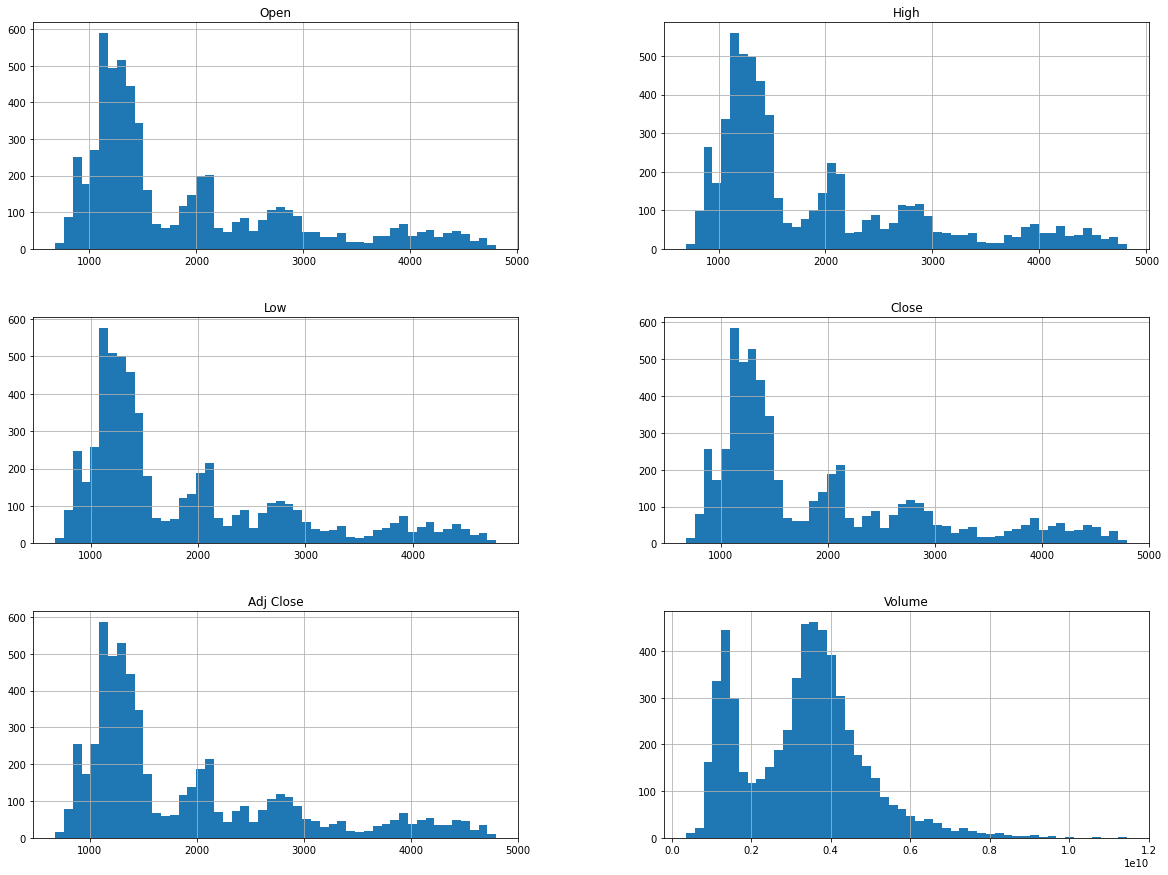

In [26]:
# Seleccionar las columnas numéricas para el análisis univariado
num_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
datos = spy[num_cols]

# Histogramas de cada columna
datos.hist(bins=50, figsize=(20,15))
plt.show()

## ANALISIS BIVARIADO
CORRELACION ENTRE TODAS LAS COLUMNAS

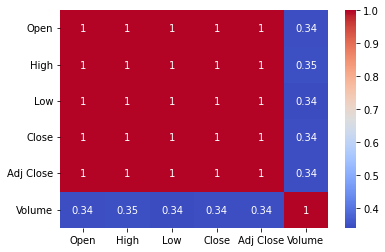

In [27]:
num_data = spy[num_cols]

# Calcula la matriz de correlación
corr_matrix = num_data.corr()

# Grafica el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#Se puede detallar la correlacion entre columnas, si la correlacion es cercana a 1 indica que hay una relación positiva fuerte entre las variables.
#Por otro lado, si la correlación es cercana a -1, indica que hay una relación negativa fuerte entre las variables.
#Si la correlación es cercana a 0, indica que no hay una relación lineal fuerte entre las variables.

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## GRAFICA PARA IDENTIFICAR PATRONES

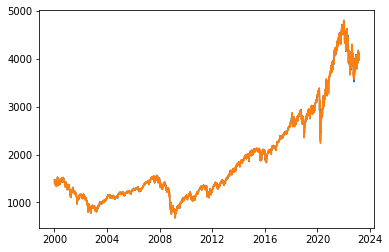

In [29]:
#Creamos la grafica para identificar patrones
plt.plot(spy['Open'])
plt.plot(spy['Close'])
plt.show()

## CORRELACION ENTRE OPEN Y CLOSE DEL SPY

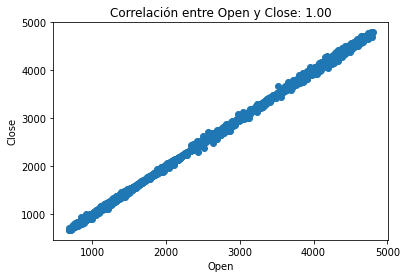

In [30]:
# Calcular la correlación
corr = spy['Open'].corr(spy['Close'])

# Visualizar la correlación
plt.scatter(spy['Open'], spy['Close'])
plt.title(f"Correlación entre Open y Close: {corr:.2f}")
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

## CORRELACION ENTRE VOLUMEN Y CLOSE DEL SPY

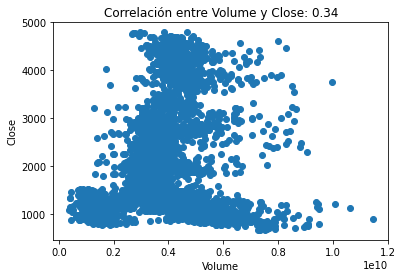

In [31]:
# Calcular la correlación
corr = spy['Volume'].corr(spy['Close'])

# Visualizar la correlación
plt.scatter(spy['Volume'], spy['Close'])
plt.title(f"Correlación entre Volume y Close: {corr:.2f}")
plt.xlabel("Volume")
plt.ylabel("Close")
plt.show()

## CORRELACION ENTRE HIGH Y LOW DEL SPY

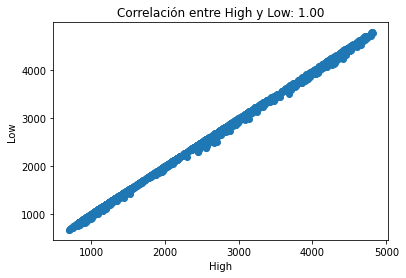

In [32]:
# Calcular la correlación
corr = spy['High'].corr(spy['Low'])

# Visualizar la correlación
plt.scatter(spy['High'], spy['Low'])
plt.title(f"Correlación entre High y Low: {corr:.2f}")
plt.xlabel("High")
plt.ylabel("Low")
plt.show()

## PROBAMOS IMPORTANDO OTROS INDICADORES IMPORTANTES PARA HACER CORRELACIONES

## CORRELACION ENTRE LOS PRECIOS DE CIERRE DEL DJI Y SPY

<AxesSubplot:>

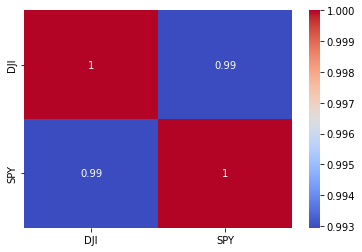

In [33]:
df_dij = pd.DataFrame({'DJI': dji['Close'], 'SPY': spy['Close']})
corr_matrix = df_dij.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [34]:
df2 = pd.DataFrame({'DJIA': dji['Close'], 'SPY': spy['Close']})
df_ret = df2.pct_change().dropna()
df_ret.corr()


,DJIA,SPY
DJIA,1.000000,0.966817
SPY,0.966817,1.000000


## CORRELACION ENTRE LA VOLATILIDAD DIARIA

In [35]:
df3 = pd.DataFrame({'DJIA': dji['Close'], 'SPY': spy['Close']})
df_ret = df3.pct_change().dropna()
df_vol = df_ret.rolling(window=30).std().dropna()
df_vol.corr()

,DJIA,SPY
DJIA,1.000000,0.984921
SPY,0.984921,1.000000


## Correlación entre volumen del SPY y del DJIA

## BUSCAMOS DE DONDE PROVIENE EL OUTLIER

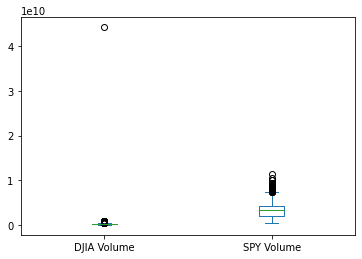

In [36]:
# Combinar los datos en un solo DataFrame
dfv = pd.DataFrame({'DJIA': dji['Close'], 'SPY': spy['Close'], 'DJIA Volume': dji['Volume'], 'SPY Volume': spy['Volume']})

# Graficar el volumen del DJIA y el SPY
dfv[['DJIA Volume', 'SPY Volume']].plot(kind='box')
plt.show()

## SELECCIONAMOS UN SECTOR Y UN GRUPO DE EMPRESAS PAR ANALIZAR

In [37]:
empresas = [
    'BKR', # Baker Hughes
    'CVX', # Chevron
    'HAL',  # Halliburton
    'SLB', # Schlumberger
    'CTRA', # Coterra
]

recolector = []
for nemo in empresas:
    ticker = yf.Ticker(nemo)
    px = ticker.history(start='2000-01-01', interval='1d')[['Open', 'Close','Volume']]
    px.columns = [f"{nemo}_{col}" for col in px.columns]
    recolector.append(px)

precios = pd.concat(recolector, axis=1)


In [38]:
precios

,BKR_Open,BKR_Close,BKR_Volume,CVX_Open,CVX_Close,CVX_Volume,HAL_Open,HAL_Close,HAL_Volume,SLB_Open,SLB_Close,SLB_Volume,CTRA_Open,CTRA_Close,CTRA_Volume
Date,,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,10.471120,9.665649,1468700,18.330091,17.849827,4387600,14.263848,13.514279,3490800,18.042638,17.819639,7239800,1.022583,0.943005,1306800
2000-01-04 00:00:00-05:00,9.576153,9.665649,2082300,17.703079,17.849827,3702400,13.249719,13.580411,4968200,17.495270,17.576361,7963000,0.935047,0.915152,334800
2000-01-05 00:00:00-05:00,9.725316,9.725316,1833700,17.729752,18.169994,5567600,13.227676,12.985168,7524600,17.535820,17.535820,4826200,0.907195,0.931068,363600
2000-01-06 00:00:00-05:00,9.874482,10.650121,2234700,18.210030,18.943768,4353400,12.985172,13.514279,8868600,17.637183,18.731905,8005000,0.927089,0.950963,538800
2000-01-07 00:00:00-05:00,10.858941,11.366089,2810600,19.210570,19.277273,4487400,13.844972,14.352033,8737400,18.954908,19.076544,7368600,0.950963,0.990752,388800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,31.799999,30.590000,9360800,164.729996,162.850006,9601700,37.790001,36.500000,9561600,55.000000,53.340000,9160200,24.379999,23.400000,13904500
2023-02-21 00:00:00-05:00,30.400000,30.129999,6773600,162.179993,161.000000,7259700,36.349998,36.400002,6049000,53.299999,53.400002,7422100,23.250000,23.000000,10038800
2023-02-22 00:00:00-05:00,30.120001,30.049999,5977700,160.279999,160.350006,6205900,36.259998,35.709999,7377700,53.160000,52.410000,9181100,23.180000,23.260000,10539100


In [39]:
# Identificar los valores nulos
print(precios.isnull())

# Contar los valores nulos por columna
print(precios.isnull().sum())

                           BKR_Open  BKR_Close  BKR_Volume  CVX_Open  \
Date                                                                   
2000-01-03 00:00:00-05:00     False      False       False     False   
2000-01-04 00:00:00-05:00     False      False       False     False   
2000-01-05 00:00:00-05:00     False      False       False     False   
2000-01-06 00:00:00-05:00     False      False       False     False   
2000-01-07 00:00:00-05:00     False      False       False     False   
...                             ...        ...         ...       ...   
2023-02-17 00:00:00-05:00     False      False       False     False   
2023-02-21 00:00:00-05:00     False      False       False     False   
2023-02-22 00:00:00-05:00     False      False       False     False   
2023-02-23 00:00:00-05:00     False      False       False     False   
2023-02-24 00:00:00-05:00     False      False       False     False   

                           CVX_Close  CVX_Volume  HAL_Open  HAL

In [40]:
# Resumen estadístico
print(precios.describe())

          BKR_Open    BKR_Close    BKR_Volume     CVX_Open    CVX_Close  \
count  5824.000000  5824.000000  5.824000e+03  5824.000000  5824.000000   
mean     26.087740    26.079229  4.698838e+06    61.427681    61.432984   
std       8.524124     8.518499  3.485110e+06    35.524632    35.531016   
min       8.775457     8.466910  0.000000e+00    14.623561    14.536600   
25%      19.195249    19.172582  2.643800e+06    30.354930    30.349926   
50%      25.016221    25.028662  3.906100e+06    61.173999    61.413412   
75%      31.965858    32.010815  5.721000e+06    83.128290    83.133520   
max      51.700930    51.570271  7.909050e+07   184.056546   186.144424   

         CVX_Volume     HAL_Open    HAL_Close    HAL_Volume     SLB_Open  \
count  5.824000e+03  5824.000000  5824.000000  5.824000e+03  5824.000000   
mean   8.206031e+06    26.254093    26.242289  1.223442e+07    43.273460   
std    4.303826e+06    12.394628    12.393324  7.584342e+06    19.272291   
min    1.067000e+06 

## CREO UNA GRAFICA CON LOS PRECIOS DE APERTURA Y CIERRE DE LAS 5 EMPRESAS QUE TOME

In [41]:
import matplotlib.dates as mdates

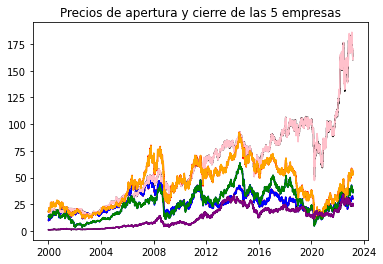

In [42]:
plt.plot(precios['BKR_Open'], color='red')
plt.plot(precios['BKR_Close'], color='blue')
plt.plot(precios['CVX_Open'], color='black')
plt.plot(precios['CVX_Close'], color='pink')
plt.plot(precios['HAL_Open'], color='blue')
plt.plot(precios['HAL_Close'], color='green')
plt.plot(precios['SLB_Open'], color='red')
plt.plot(precios['SLB_Close'], color='orange')
plt.plot(precios['CTRA_Open'], color='black')
plt.plot(precios['CTRA_Close'], color='purple')
plt.title('Precios de apertura y cierre de las 5 empresas')
plt.show()

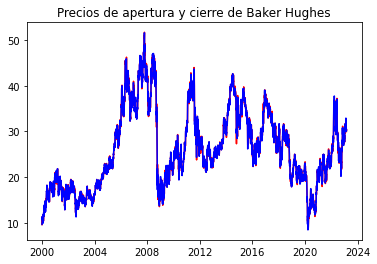

In [43]:
plt.plot(precios['BKR_Open'], color='red')
plt.plot(precios['BKR_Close'], color='blue')
plt.title('Precios de apertura y cierre de Baker Hughes')
plt.show()

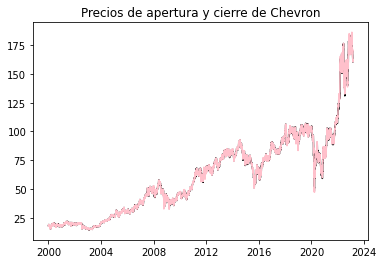

In [44]:
plt.plot(precios['CVX_Open'], color='black')
plt.plot(precios['CVX_Close'], color='pink')
plt.title('Precios de apertura y cierre de Chevron')
plt.show()

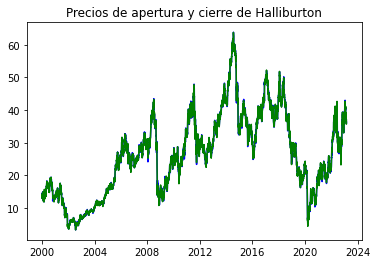

In [45]:
plt.plot(precios['HAL_Open'], color='blue')
plt.plot(precios['HAL_Close'], color='green')
plt.title('Precios de apertura y cierre de Halliburton')
plt.show()

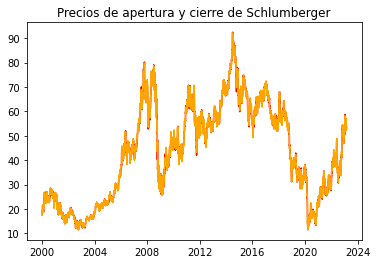

In [46]:
plt.plot(precios['SLB_Open'], color='red')
plt.plot(precios['SLB_Close'], color='orange')
plt.title('Precios de apertura y cierre de Schlumberger')
plt.show()

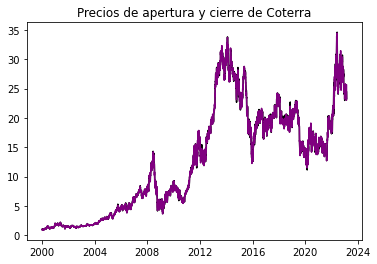

In [47]:
plt.plot(precios['CTRA_Open'], color='black')
plt.plot(precios['CTRA_Close'], color='purple')
plt.title('Precios de apertura y cierre de Coterra')
plt.show()

In [48]:
cvx = yf.download('CVX', start='2000-01-01')

[*********************100%***********************]  1 of 1 completed


In [49]:
cvx

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,42.937500,42.937500,41.281250,41.812500,17.849825,4387600
2000-01-04,41.468750,42.062500,41.250000,41.812500,17.849825,3702400
2000-01-05,41.531250,43.281250,41.531250,42.562500,18.170002,5567600
2000-01-06,42.656250,44.593750,42.656250,44.375000,18.943771,4353400
2000-01-07,45.000000,45.437500,44.500000,45.156250,19.277281,4487400
...,...,...,...,...,...,...
2023-02-17,164.729996,164.839996,161.850006,162.850006,162.850006,9601700
2023-02-21,162.179993,163.750000,160.699997,161.000000,161.000000,7259700
2023-02-22,160.279999,161.660004,158.910004,160.350006,160.350006,6205900


## PASO A CSV EL DATABASE DE LAS EMPRESAS Y EL DE EL SPY

In [50]:
xle = xle.reset_index()
dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sabado',
    6: 'Domingo'}

xle['Dias'] = xle['Date'].dt.dayofweek.map(dias)
xle['Date'] = xle['Date'].dt.date


xle

,Date,Open,High,Low,Close,Adj Close,Volume,Dias
0,2000-01-03,27.312500,27.312500,26.375000,26.562500,14.830883,380300,Lunes
1,2000-01-04,26.312500,26.312500,25.875000,26.062500,14.551711,722200,Martes
2,2000-01-05,26.125000,26.750000,26.000000,26.750000,14.935573,337800,Miercoles
3,2000-01-06,26.750000,27.843750,26.750000,27.781250,15.511359,133100,Jueves
4,2000-01-07,27.687500,28.406250,27.687500,28.078125,15.677118,468000,Viernes
...,...,...,...,...,...,...,...,...
5819,2023-02-17,86.250000,86.309998,84.120003,84.489998,84.489998,22320000,Viernes
5820,2023-02-21,84.120003,85.040001,83.910004,84.070000,84.070000,16811300,Martes
5821,2023-02-22,83.839996,84.629997,82.790001,83.510002,83.510002,20135200,Miercoles
5822,2023-02-23,84.769997,85.260002,83.699997,84.769997,84.769997,17511700,Jueves


In [51]:
energy_spy = energy_spy.reset_index()
dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sabado',
    6: 'Domingo'}

energy_spy['Dias'] = energy_spy['Date'].dt.dayofweek.map(dias)
energy_spy['Date'] = energy_spy['Date'].dt.date


energy_spy

,Date,APA_Open,APA_Close,APA_Volume,BKR_Open,BKR_Close,BKR_Volume,CVX_Open,CVX_Close,CVX_Volume,...,TRGP_Open,TRGP_Close,TRGP_Volume,VLO_Open,VLO_Close,VLO_Volume,WMB_Open,WMB_Close,WMB_Volume,Dias
0,2000-01-03,12.181660,11.330811,1082697,10.471123,9.665652,1468700,18.330091,17.849827,4387600,...,NaN,NaN,NaN,2.629284,2.530066,966658,10.036264,10.036264,2366796,Lunes
1,2000-01-04,10.957271,10.832757,2959572,9.576155,9.665652,2082300,17.703079,17.849827,3702400,...,NaN,NaN,NaN,2.521797,2.505260,1176269,9.550642,9.813689,3364720,Martes
2,2000-01-05,10.915768,11.144045,2170014,9.725318,9.725318,1833700,17.729765,18.170008,5567600,...,NaN,NaN,NaN,2.530064,2.596210,866010,9.874386,10.420714,2731730,Miercoles
3,2000-01-06,11.455333,12.202419,2416029,9.874475,10.650113,2234700,18.210023,18.943760,4353400,...,NaN,NaN,NaN,2.596209,2.678891,1265102,10.420716,10.643294,8654732,Jueves
4,2000-01-07,12.368434,12.160909,1709169,10.858947,11.366096,2810600,19.210572,19.277275,4487400,...,NaN,NaN,NaN,2.678892,2.645819,564504,10.683761,10.926573,2319625,Viernes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,2023-02-17,39.250000,38.090000,6910000,31.799999,30.590000,9360800,164.729996,162.850006,9601700,...,75.150002,73.940002,1436600.0,131.720001,129.610001,3379100,31.730000,31.260000,11956200,Viernes
5820,2023-02-21,38.000000,38.060001,5075600,30.400000,30.129999,6773600,162.179993,161.000000,7259700,...,73.360001,73.290001,2034100.0,129.880005,132.199997,3343400,31.129999,30.790001,9590900,Martes
5821,2023-02-22,37.730000,37.860001,5463400,30.120001,30.049999,5977700,160.279999,160.350006,6205900,...,72.970001,75.559998,3295600.0,132.639999,130.690002,3245400,30.879999,30.910000,8341900,Miercoles
5822,2023-02-23,39.930000,39.119999,7876100,30.549999,30.469999,4908200,162.250000,161.929993,6445500,...,76.989998,76.470001,2151500.0,132.600006,132.429993,2620300,31.180000,31.049999,5820300,Jueves


In [52]:
precios = precios.reset_index()
dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sabado',
    6: 'Domingo'}

precios['Dias'] = precios['Date'].dt.dayofweek.map(dias)
precios['Date'] = precios['Date'].dt.date


precios

,Date,BKR_Open,BKR_Close,BKR_Volume,CVX_Open,CVX_Close,CVX_Volume,HAL_Open,HAL_Close,HAL_Volume,SLB_Open,SLB_Close,SLB_Volume,CTRA_Open,CTRA_Close,CTRA_Volume,Dias
0,2000-01-03,10.471120,9.665649,1468700,18.330091,17.849827,4387600,14.263848,13.514279,3490800,18.042638,17.819639,7239800,1.022583,0.943005,1306800,Lunes
1,2000-01-04,9.576153,9.665649,2082300,17.703079,17.849827,3702400,13.249719,13.580411,4968200,17.495270,17.576361,7963000,0.935047,0.915152,334800,Martes
2,2000-01-05,9.725316,9.725316,1833700,17.729752,18.169994,5567600,13.227676,12.985168,7524600,17.535820,17.535820,4826200,0.907195,0.931068,363600,Miercoles
3,2000-01-06,9.874482,10.650121,2234700,18.210030,18.943768,4353400,12.985172,13.514279,8868600,17.637183,18.731905,8005000,0.927089,0.950963,538800,Jueves
4,2000-01-07,10.858941,11.366089,2810600,19.210570,19.277273,4487400,13.844972,14.352033,8737400,18.954908,19.076544,7368600,0.950963,0.990752,388800,Viernes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,2023-02-17,31.799999,30.590000,9360800,164.729996,162.850006,9601700,37.790001,36.500000,9561600,55.000000,53.340000,9160200,24.379999,23.400000,13904500,Viernes
5820,2023-02-21,30.400000,30.129999,6773600,162.179993,161.000000,7259700,36.349998,36.400002,6049000,53.299999,53.400002,7422100,23.250000,23.000000,10038800,Martes
5821,2023-02-22,30.120001,30.049999,5977700,160.279999,160.350006,6205900,36.259998,35.709999,7377700,53.160000,52.410000,9181100,23.180000,23.260000,10539100,Miercoles
5822,2023-02-23,30.549999,30.469999,4908200,162.250000,161.929993,6445500,36.490002,36.230000,5403300,53.580002,53.320000,6324500,24.190001,24.670000,15050200,Jueves


In [53]:
spy = spy.reset_index()
dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sabado',
    6: 'Domingo'}

spy['Dias'] = spy['Date'].dt.dayofweek.map(dias)

spy

,Date,Open,High,Low,Close,Adj Close,Volume,Dias
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,Lunes
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,Martes
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,Miercoles
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,Jueves
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,Viernes
...,...,...,...,...,...,...,...,...
5819,2023-02-17,4077.389893,4081.510010,4047.949951,4079.090088,4079.090088,4045480000,Viernes
5820,2023-02-21,4052.350098,4052.350098,3995.189941,3997.340088,3997.340088,4121590000,Martes
5821,2023-02-22,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000,Miercoles
5822,2023-02-23,4018.600098,4028.300049,3969.189941,4012.320068,4012.320068,3952940000,Jueves


In [54]:
cvx = cvx.reset_index()
dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sabado',
    6: 'Domingo'}

cvx['Dias'] = cvx['Date'].dt.dayofweek.map(dias)

cvx

,Date,Open,High,Low,Close,Adj Close,Volume,Dias
0,2000-01-03,42.937500,42.937500,41.281250,41.812500,17.849825,4387600,Lunes
1,2000-01-04,41.468750,42.062500,41.250000,41.812500,17.849825,3702400,Martes
2,2000-01-05,41.531250,43.281250,41.531250,42.562500,18.170002,5567600,Miercoles
3,2000-01-06,42.656250,44.593750,42.656250,44.375000,18.943771,4353400,Jueves
4,2000-01-07,45.000000,45.437500,44.500000,45.156250,19.277281,4487400,Viernes
...,...,...,...,...,...,...,...,...
5819,2023-02-17,164.729996,164.839996,161.850006,162.850006,162.850006,9601700,Viernes
5820,2023-02-21,162.179993,163.750000,160.699997,161.000000,161.000000,7259700,Martes
5821,2023-02-22,160.279999,161.660004,158.910004,160.350006,160.350006,6205900,Miercoles
5822,2023-02-23,162.250000,162.839996,160.559998,161.929993,161.929993,6445500,Jueves


In [55]:
crude_oil = yf.download('CL=F', start="2000-01-01", end="2023-02-22")

[*********************100%***********************]  1 of 1 completed


In [56]:
crude_oil = crude_oil.reset_index()
dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sabado',
    6: 'Domingo'}

crude_oil['Dias'] = crude_oil['Date'].dt.dayofweek.map(dias)

crude_oil

,Date,Open,High,Low,Close,Adj Close,Volume,Dias
0,2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385,Miercoles
1,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978,Jueves
2,2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601,Viernes
3,2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770,Lunes
4,2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131,Martes
...,...,...,...,...,...,...,...,...
5645,2023-02-14,79.059998,79.610001,77.459999,79.059998,79.059998,299938,Martes
5646,2023-02-15,78.830002,79.150002,77.250000,78.589996,78.589996,264486,Miercoles
5647,2023-02-16,78.540001,79.540001,77.919998,78.489998,78.489998,117600,Jueves
5648,2023-02-17,78.070000,78.250000,75.059998,76.339996,76.339996,93267,Viernes


In [57]:
crude_oil

,Date,Open,High,Low,Close,Adj Close,Volume,Dias
0,2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385,Miercoles
1,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978,Jueves
2,2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601,Viernes
3,2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770,Lunes
4,2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131,Martes
...,...,...,...,...,...,...,...,...
5645,2023-02-14,79.059998,79.610001,77.459999,79.059998,79.059998,299938,Martes
5646,2023-02-15,78.830002,79.150002,77.250000,78.589996,78.589996,264486,Miercoles
5647,2023-02-16,78.540001,79.540001,77.919998,78.489998,78.489998,117600,Jueves
5648,2023-02-17,78.070000,78.250000,75.059998,76.339996,76.339996,93267,Viernes


In [58]:
crude_oil.to_csv('petroleo.csv', index=False)

In [59]:
precios.to_csv('empresas.csv', index=False)

In [60]:
spy.to_csv('spy.csv', index = False)

In [61]:
xle.to_csv('xle.csv', index = False)

In [62]:
energy_spy.to_csv('energy_spy.csv', index = False)

In [63]:
cvx.to_csv('cvx.csv', index = False)

In [65]:
print(cvx.dtypes)


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Dias                 object
dtype: object
